In [1]:
import yfinance as yf
import pandas as pd
import pickle

## Screen Chinese stocks

In [12]:
from finvizfinance.screener.overview import Overview

foverview = Overview()
filters_dict = {
#     'Exchange':'NASDAQ',
                'Country': 'China',
                'Market Cap.':'+Small (over $300mln)',
                'Price': 'Over $1'}
foverview.set_filter(filters_dict=filters_dict)
df = foverview.screener_view()
df.shape
df.head()

lst = sorted(list(set(df.Ticker)))
len(lst)


73

In [13]:
df

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,API,"Agora, Inc.",Technology,Software - Application,China,4.385700e+08,NaN,4.12,-0.0096,460320.0
1,ATAT,Atour Lifestyle Holdings Limited,Consumer Cyclical,Lodging,China,3.260000e+09,138.89,25.00,0.0138,326498.0
2,ATHM,Autohome Inc.,Communication Services,Internet Content & Information,China,4.410000e+09,20.91,36.55,-0.0261,304114.0
3,BABA,Alibaba Group Holding Limited,Consumer Cyclical,Internet Retail,China,3.048400e+11,163.51,118.38,-0.0182,17884063.0
4,BEDU,Bright Scholar Education Holdings Limited,Consumer Defensive,Education & Training Services,China,3.031600e+08,NaN,2.60,-0.0189,8687.0
...,...,...,...,...,...,...,...,...,...,...
68,YUMC,"Yum China Holdings, Inc.",Consumer Cyclical,Restaurants,China,2.564000e+10,30.86,62.22,-0.0003,1187602.0
69,ZH,Zhihu Inc.,Communication Services,Internet Content & Information,China,1.070000e+09,NaN,1.81,0.0112,3918477.0
70,ZLAB,Zai Lab Limited,Healthcare,Biotechnology,China,4.230000e+09,NaN,44.88,0.0092,562619.0
71,ZNH,China Southern Airlines Company Limited,Industrials,Airlines,China,1.853000e+10,NaN,34.46,-0.0160,55906.0


In [49]:
df.Sector.value_counts()

Consumer Cyclical         22
Communication Services    13
Technology                11
Financial                  9
Consumer Defensive         7
Industrials                6
Healthcare                 4
Real Estate                1
Name: Sector, dtype: int64

In [55]:
df[df.Ticker.isin(['BABA','BILI','PDD','EDU'])]

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
3,BABA,Alibaba Group Holding Limited,Consumer Cyclical,Internet Retail,China,3.048400e+11,163.51,118.38,-0.0182,17884063.0
7,BILI,Bilibili Inc.,Communication Services,Electronic Gaming & Multimedia,China,1.106000e+10,NaN,27.78,-0.0086,5250604.0
20,EDU,New Oriental Education & Technology Group Inc.,Consumer Defensive,Education & Training Services,China,7.540000e+09,NaN,43.93,-0.0157,1206383.0
49,PDD,Pinduoduo Inc.,Consumer Cyclical,Internet Retail,China,1.286200e+11,35.41,104.68,0.0002,5892174.0


In [51]:
df[df.Sector=='Technology']

,Ticker,Company,Sector,Industry,Country,Market Cap,P/E,Price,Change,Volume
0,API,"Agora, Inc.",Technology,Software - Application,China,4.385700e+08,NaN,4.12,-0.0096,460320.0
11,CAN,Canaan Inc.,Technology,Computer Hardware,China,5.163400e+08,1.66,3.44,0.0424,2167666.0
12,CD,Chindata Group Holdings Limited,Technology,Information Technology Services,China,3.170000e+09,33.35,8.67,-0.0291,576239.0
18,DQ,Daqo New Energy Corp.,Technology,Semiconductor Equipment & Materials,China,3.200000e+09,2.15,45.67,-0.0233,558777.0
25,GDS,GDS Holdings Limited,Technology,Software - Infrastructure,China,5.090000e+09,NaN,26.38,0.0096,1352227.0
29,HOLO,MicroCloud Hologram Inc.,Technology,Electronic Components,China,3.776800e+08,93.93,10.05,0.1420,876954.0
35,JKS,"JinkoSolar Holding Co., Ltd.",Technology,Solar,China,2.800000e+09,139.48,56.21,-0.0060,452838.0
36,KC,Kingsoft Cloud Holdings Limited,Technology,Software - Application,China,1.320000e+09,NaN,5.43,0.0585,2493536.0
60,TUYA,Tuya Inc.,Technology,Software - Infrastructure,China,1.570000e+09,NaN,2.89,0.1333,1286368.0
62,VNET,"VNET Group, Inc.",Technology,Information Technology Services,China,9.410700e+08,NaN,6.26,-0.0063,987185.0


In [50]:
df.Industry.value_counts()

Internet Content & Information         11
Internet Retail                         7
Credit Services                         4
Education & Training Services           4
Auto Manufacturers                      4
Lodging                                 3
Software - Application                  3
Biotechnology                           2
Asset Management                        2
Information Technology Services         2
Airlines                                2
Restaurants                             2
Software - Infrastructure               2
Specialty Retail                        2
Luxury Goods                            1
Real Estate Services                    1
Medical Instruments & Supplies          1
Diagnostics & Research                  1
Tobacco                                 1
Solar                                   1
Capital Markets                         1
Insurance - Diversified                 1
Household & Personal Products           1
Travel Services                   

In [28]:
ticker = df.Ticker.to_list()
start_dt = '2022-10-01'

df_yf=yf.download(
        ticker,
#         period = "1y",
        start = start_dt,
        interval = "1d",
        group_by = 'ticker',
        prepost = True,
        threads = True,
        proxy = None
    )
# df_yf.columns = [x.lower() for x in df_yf.columns]

[*********************100%***********************]  73 of 73 completed


In [29]:
df_yf = df_yf.xs('Close', level=1, axis=1)
df_yf.head(2)

,THCH,MNSO,BABA,NAAS,ATHM,NIU,MOMO,GHG,NIO,IQ,...,HOLO,RLX,QFIN,ZTO,LANV,LX,ZH,NOAH,BEKE,HTHT
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-03 00:00:00-04:00,7.99,5.66,80.449997,4.12,30.450001,3.99,4.76,3.06,15.49,2.64,...,2.23,1.00,13.27,24.240000,9.95,1.70,1.09,13.80,17.120001,35.820000
2022-10-04 00:00:00-04:00,7.99,6.07,84.110001,4.16,31.549999,4.12,5.16,3.34,16.73,2.88,...,2.66,1.04,14.78,25.290001,9.96,1.83,1.25,14.65,18.000000,37.669998


In [30]:
df_yf = df_yf.reset_index()
df_yf['Date'] = pd.to_datetime(df_yf.Date.astype(str).str[:10])
df_yf

,Date,THCH,MNSO,BABA,NAAS,ATHM,NIU,MOMO,GHG,NIO,...,HOLO,RLX,QFIN,ZTO,LANV,LX,ZH,NOAH,BEKE,HTHT
0,2022-10-03,7.99,5.66,80.449997,4.120,30.450001,3.99,4.76,3.060,15.490000,...,2.23,1.000,13.270000,24.240000,9.95,1.70,1.09,13.800000,17.120001,35.820000
1,2022-10-04,7.99,6.07,84.110001,4.160,31.549999,4.12,5.16,3.340,16.730000,...,2.66,1.040,14.780000,25.290001,9.96,1.83,1.25,14.650000,18.000000,37.669998
2,2022-10-05,7.99,6.12,84.389999,4.200,31.620001,4.08,5.07,3.230,16.040001,...,2.09,1.030,15.560000,25.219999,9.95,1.79,1.25,14.600000,17.820000,37.230000
3,2022-10-06,7.99,5.90,84.320000,4.190,31.200001,3.92,5.09,3.250,14.770000,...,1.98,1.030,15.500000,24.969999,9.95,1.76,1.23,14.250000,17.150000,36.180000
4,2022-10-07,4.48,5.76,81.239998,3.680,30.110001,3.52,4.98,3.090,13.760000,...,1.70,0.944,14.790000,24.110001,9.95,1.75,1.15,14.040000,16.360001,34.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2023-01-23,2.91,15.16,119.529999,5.680,36.770000,5.67,10.28,4.650,12.060000,...,12.96,2.770,22.370001,28.540001,6.06,3.45,1.72,17.629999,18.830000,48.720001
77,2023-01-24,2.75,15.00,119.440002,5.385,36.639999,5.48,10.35,4.270,11.680000,...,12.48,2.670,22.379999,28.820000,6.60,3.43,1.68,18.330000,18.440001,48.980000
78,2023-01-25,2.70,15.27,120.250000,5.190,36.360001,5.56,10.40,4.317,11.630000,...,11.44,2.610,23.030001,28.930000,6.49,3.41,1.63,17.799999,18.360001,49.779999
79,2023-01-26,2.85,15.29,120.570000,5.380,37.529999,5.77,11.31,4.400,12.170000,...,8.80,2.680,23.549999,29.240000,7.00,3.56,1.79,19.510000,18.910000,50.970001


In [31]:
df_yf.iloc[:, 1:]

,THCH,MNSO,BABA,NAAS,ATHM,NIU,MOMO,GHG,NIO,IQ,...,HOLO,RLX,QFIN,ZTO,LANV,LX,ZH,NOAH,BEKE,HTHT
0,7.99,5.66,80.449997,4.120,30.450001,3.99,4.76,3.060,15.490000,2.64,...,2.23,1.000,13.270000,24.240000,9.95,1.70,1.09,13.800000,17.120001,35.820000
1,7.99,6.07,84.110001,4.160,31.549999,4.12,5.16,3.340,16.730000,2.88,...,2.66,1.040,14.780000,25.290001,9.96,1.83,1.25,14.650000,18.000000,37.669998
2,7.99,6.12,84.389999,4.200,31.620001,4.08,5.07,3.230,16.040001,2.62,...,2.09,1.030,15.560000,25.219999,9.95,1.79,1.25,14.600000,17.820000,37.230000
3,7.99,5.90,84.320000,4.190,31.200001,3.92,5.09,3.250,14.770000,2.59,...,1.98,1.030,15.500000,24.969999,9.95,1.76,1.23,14.250000,17.150000,36.180000
4,4.48,5.76,81.239998,3.680,30.110001,3.52,4.98,3.090,13.760000,2.45,...,1.70,0.944,14.790000,24.110001,9.95,1.75,1.15,14.040000,16.360001,34.660000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2.91,15.16,119.529999,5.680,36.770000,5.67,10.28,4.650,12.060000,5.80,...,12.96,2.770,22.370001,28.540001,6.06,3.45,1.72,17.629999,18.830000,48.720001
77,2.75,15.00,119.440002,5.385,36.639999,5.48,10.35,4.270,11.680000,5.78,...,12.48,2.670,22.379999,28.820000,6.60,3.43,1.68,18.330000,18.440001,48.980000
78,2.70,15.27,120.250000,5.190,36.360001,5.56,10.40,4.317,11.630000,5.77,...,11.44,2.610,23.030001,28.930000,6.49,3.41,1.63,17.799999,18.360001,49.779999
79,2.85,15.29,120.570000,5.380,37.529999,5.77,11.31,4.400,12.170000,6.40,...,8.80,2.680,23.549999,29.240000,7.00,3.56,1.79,19.510000,18.910000,50.970001


In [44]:
df_rate = (df_yf.iloc[:, 1:] - df_yf.iloc[0, 1:].values.squeeze()).div(df_yf.iloc[0, 1:])
df_rate.index = df_yf.Date

<AxesSubplot:xlabel='Date'>

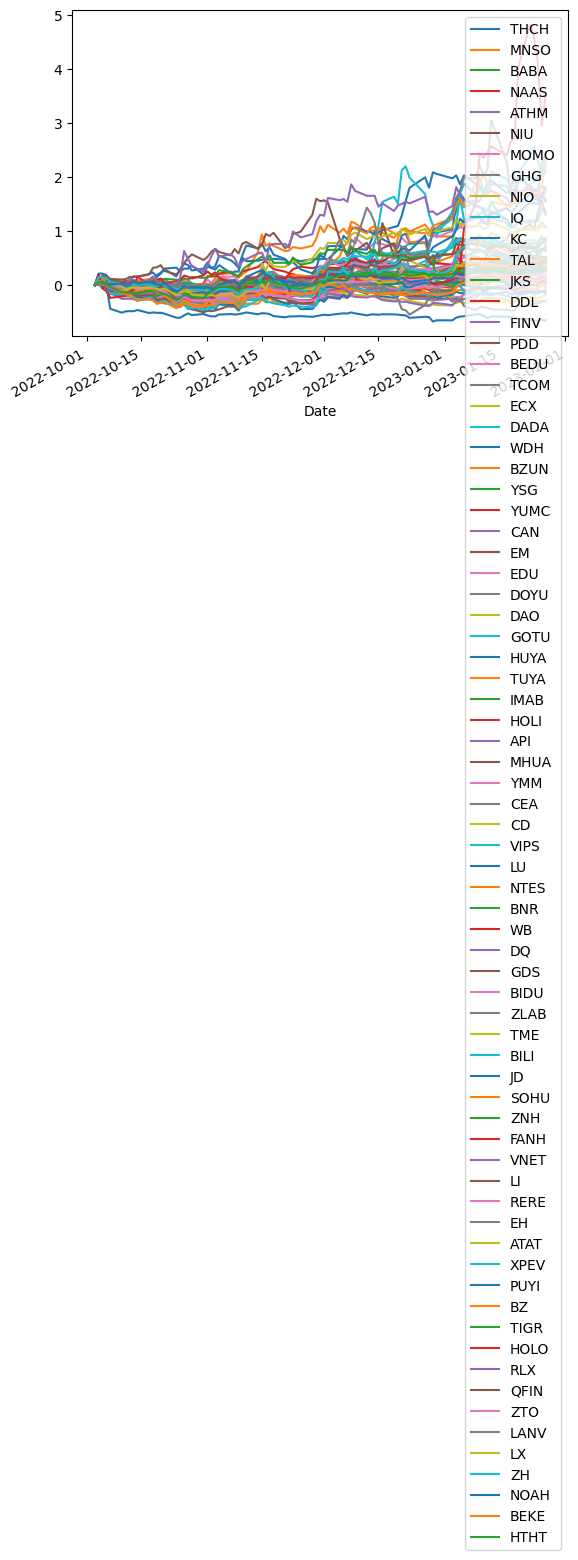

In [46]:
df_rate.plot()

In [58]:
import panel as pn
import altair as alt
from altair import datum
import pandas as pd
# from vega_datasets import data
import datetime as dt

In [60]:
alt.renderers.enable('default')
pn.extension('vega')
# https://towardsdatascience.com/how-to-build-a-time-series-dashboard-in-python-with-panel-altair-and-a-jupyter-notebook-c0ed40f02289
# https://panel.holoviz.org/gallery/apis/stocks_plotly.html